In [149]:
import pandas as pd
from surprise import Dataset, Reader
import matplotlib.pyplot as plt
import numpy as np
import surprise

In [150]:
ratings = pd.read_csv('C:/Users/kimjunseok/Downloads/mealion/ratings.csv')

In [151]:
reader = Reader(rating_scale=(0.5, 5))

In [152]:
data = Dataset.load_from_df(ratings[['restaurantId','userId','score']],
                           reader=reader)

In [153]:
data

In [154]:
df = pd.DataFrame(data.raw_ratings, columns =['restaurantId','userId','score','otherscores'])
del df ["otherscores"]
print(df.head(10))

   restaurantId  userId  score
0        506184     3.0    4.0
1        341523     3.0    3.0
2        385515     3.0    5.0
3        514251     1.0    5.0
4        341523     1.0    4.0
5        314205     1.0    3.0
6        550209     1.0    4.0
7        227922     1.0    4.0
8        418808     1.0    4.5
9        514126     1.0    4.0


In [155]:
df

,restaurantId,userId,score
0,506184,3.0,4.0
1,341523,3.0,3.0
2,385515,3.0,5.0
3,514251,1.0,5.0
4,341523,1.0,4.0
...,...,...,...
3648,850776,532.0,5.0
3649,851099,330.0,4.5
3650,698116,330.0,4.0
3651,668776,330.0,5.0


In [156]:
print(df.set_index(['restaurantId','userId']).head(10))

                     score
restaurantId userId       
506184       3.0       4.0
341523       3.0       3.0
385515       3.0       5.0
514251       1.0       5.0
341523       1.0       4.0
314205       1.0       3.0
550209       1.0       4.0
227922       1.0       4.0
418808       1.0       4.5
514126       1.0       4.0


In [157]:
print(df.set_index(['restaurantId','userId']).head(10).unstack())

             score     
userId         3.0  1.0
restaurantId           
506184         4.0  NaN
341523         3.0  4.0
385515         5.0  NaN
514251         NaN  5.0
314205         NaN  3.0
550209         NaN  4.0
227922         NaN  4.0
418808         NaN  4.5
514126         NaN  4.0


In [158]:
df_table = df.set_index(['restaurantId','userId']).unstack()
print(df_table)

             score                                                        ...  \
userId         NaN 1.0   3.0   4.0   6.0   7.0   9.0   11.0  12.0  20.0   ...   
restaurantId                                                              ...   
1              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2050           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3664           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3764           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3766           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
851094         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
851096         NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN   NaN   NaN  ...   
851097         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
851098         NaN   NaN   N

In [159]:
print(df_table.iloc[212:222, 100:120].fillna(""))

             score                                                        \
userId       249.0 251.0 258.0 261.0 262.0 264.0 267.0 268.0 275.0 278.0   
restaurantId                                                               
138212                                                                     
138282                                                         3.0         
138376                                                                     
138406                                                                     
138431                                                                     
138433                                                                     
147536                                                                     
147573                                                                     
147578                                                                     
147647                                                                     

           

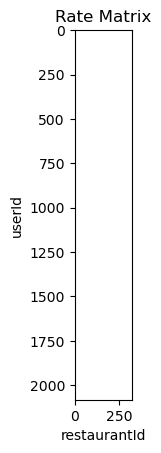

In [160]:
plt.imshow(df_table)
plt.grid(False)
plt.xlabel("restaurantId")
plt.ylabel("userId")
plt.title("Rate Matrix")
plt.show()

### 베이스 라인-als

In [217]:
from surprise.model_selection import GridSearchCV

param_grid = {'bsl_options': {'method': ['als'],
                              'epochs':[2,5,10 ],
                              'reg_i': [2,5,15], # lambda 2
                              'reg_u': [3,5,10],# lambda 3
                             }   
             }
grid = GridSearchCV(surprise.BaselineOnly, param_grid, measures=['rmse','mae'], cv=3, return_train_measures=True, n_jobs=1)
grid.fit(data)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

In [218]:
print(grid.best_score['rmse'])
print(grid.best_params['rmse'])
print(grid.best_score['mae'])
print(grid.best_params['mae'])

0.766012885616389
{'bsl_options': {'method': 'als', 'epochs': 2, 'reg_i': 2, 'reg_u': 5}}
0.5890727355969142
{'bsl_options': {'method': 'als', 'epochs': 2, 'reg_i': 2, 'reg_u': 5}}


In [220]:
from surprise.model_selection import KFold
np.random.seed(0)

bsl_options = {
    'method': 'als',
    'n_epochs': 2,
    'reg_u' : 5,
    'reg_i': 2
}
algo = surprise.BaselineOnly(bsl_options=bsl_options)

acc = np.zeros(3)
cv = KFold(3)
for i , (trainset, testset) in enumerate(cv.split(data)):
    algo.fit(trainset)
    predictions = algo.test(testset)
    acc[i] = surprise.accuracy.rmse(predictions, verbose=True)
    
    
# 2가지 방식 ‘ALS’ 랑 ‘SGD’방식이 있다.

Estimating biases using als...
RMSE: 0.7587
Estimating biases using als...
RMSE: 0.7867
Estimating biases using als...
RMSE: 0.7723


In [221]:
print(acc.mean())

0.7725840696895191


In [222]:
from surprise.model_selection import cross_validate

print(cross_validate(algo, data))

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
{'test_rmse': array([0.77011781, 0.78815671, 0.74867395, 0.7789555 , 0.73830786]), 'test_mae': array([0.59613719, 0.58423845, 0.57242559, 0.60256576, 0.57476356]), 'fit_time': (0.0050013065338134766, 0.006995201110839844, 0.003998517990112305, 0.002998828887939453, 0.0029997825622558594), 'test_time': (0.004995822906494141, 0.006027698516845703, 0.005031108856201172, 0.002998828887939453, 0.002001047134399414)}


### 베이스 라인-SGD

In [228]:
from surprise.model_selection import GridSearchCV

param_grid = {'bsl_options': {'method': ['sgd'],
                              'n_epoch':[5, 20, 40],
                              'reg': [ 0.01, 0.02, 0.04], # lambda 2
                              'learning_rate': [ 0.005,0.01, 0.05 ],# lambda 3
                             }   
             }
grid = GridSearchCV(surprise.BaselineOnly, param_grid, measures=['rmse','mae'], cv=3, return_train_measures=True, n_jobs=1)
grid.fit(data)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimati

In [229]:
print(grid.best_score['rmse'])
print(grid.best_params['rmse'])
print(grid.best_score['mae'])
print(grid.best_params['mae'])

0.766643041478439
{'bsl_options': {'method': 'sgd', 'n_epoch': 5, 'reg': 0.01, 'learning_rate': 0.01}}
0.5878028592415215
{'bsl_options': {'method': 'sgd', 'n_epoch': 5, 'reg': 0.01, 'learning_rate': 0.01}}


In [230]:
from surprise.model_selection import KFold
np.random.seed(0)

bsl_options = {
    'method': 'sgd',
    'n_epoch': 5,
    'reg' : 0.01,
    'learning_rate': 0.01
}
algo = surprise.BaselineOnly(bsl_options=bsl_options)

acc = np.zeros(3)
cv = KFold(3)
for i , (trainset, testset) in enumerate(cv.split(data)):
    algo.fit(trainset)
    predictions = algo.test(testset)
    acc[i] = surprise.accuracy.rmse(predictions, verbose=True)
    

Estimating biases using sgd...
RMSE: 0.7613
Estimating biases using sgd...
RMSE: 0.7859
Estimating biases using sgd...
RMSE: 0.7750


In [231]:
print(acc.mean())

0.7740867997014919


In [232]:
from surprise.model_selection import cross_validate

print(cross_validate(algo, data))

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
{'test_rmse': array([0.77068399, 0.78789515, 0.75159092, 0.77947513, 0.74461039]), 'test_mae': array([0.59536022, 0.58582899, 0.57394268, 0.60462795, 0.58031152]), 'fit_time': (0.01686835289001465, 0.019999265670776367, 0.012998580932617188, 0.012997150421142578, 0.011997222900390625), 'test_time': (0.005001544952392578, 0.00400543212890625, 0.0029993057250976562, 0.003000497817993164, 0.004000425338745117)}


### KNN BASIC

In [233]:
sim_options = {'name': 'msd'}  #유사도 측정 : msd
algo = surprise.KNNBasic(sim_options=sim_options)

print(cross_validate(algo, data))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
{'test_rmse': array([0.93607561, 0.82466644, 0.86670101, 0.88222266, 0.87586386]), 'test_mae': array([0.70236058, 0.65091629, 0.67742185, 0.67822134, 0.67232873]), 'fit_time': (0.08550119400024414, 0.06399750709533691, 0.060997962951660156, 0.06202220916748047, 0.0659787654876709), 'test_time': (0.02200031280517578, 0.022002696990966797, 0.025002241134643555, 0.021016597747802734, 0.028001785278320312)}


In [234]:
sim_option = {'name': 'cosine'}  #유사도 측정: cosine
algo = surprise.KNNBasic(sim_options=sim_options)
print(cross_validate(algo, data))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
{'test_rmse': array([0.8898848 , 0.84549539, 0.89951839, 0.88560569, 0.87919871]), 'test_mae': array([0.68125542, 0.6459427 , 0.70533928, 0.67663116, 0.6759296 ]), 'fit_time': (0.0699927806854248, 0.06398797035217285, 0.05998539924621582, 0.05897712707519531, 0.06602716445922852), 'test_time': (0.024030447006225586, 0.022014856338500977, 0.02101445198059082, 0.020974159240722656, 0.021013259887695312)}


In [235]:
sim_option= {'name': 'pearson'}  #유사도 측정: pearson
algo = surprise.KNNBasic(sim_options=sim_options)
print(cross_validate(algo, data))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
{'test_rmse': array([0.86337074, 0.91472394, 0.89814456, 0.85840937, 0.8572379 ]), 'test_mae': array([0.66627919, 0.69101941, 0.68451505, 0.66118693, 0.67734568]), 'fit_time': (0.06699705123901367, 0.06298422813415527, 0.06098151206970215, 0.06895899772644043, 0.062035322189331055), 'test_time': (0.022037744522094727, 0.021014928817749023, 0.021015167236328125, 0.023064613342285156, 0.02096414566040039)}


In [236]:
sim_options = {'name': 'pearson_baseline'} #유사도 측정: pearson_baseline
algo = surprise.KNNBasic(sim_options= sim_options)
cross_validate(algo, data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.91769538, 0.92704183, 0.87248623, 0.89833004, 0.89433496]),
 'test_mae': array([0.70800946, 0.7260763 , 0.6685049 , 0.70343503, 0.70173514]),
 'fit_time': (0.11081171035766602,
  0.09899020195007324,
  0.09598541259765625,
  0.09698605537414551,
  0.0969550609588623),
 'test_time': (0.019017457962036133,
  0.017004966735839844,
  0.017013072967529297,
  0.017008543014526367,
  0.018999338150024414)}

### KNNWithMeans

In [237]:
sim_options = {'name': 'msd'}
algo = surprise.KNNWithMeans(sim_options = sim_options)
cross_validate(algo, data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.90528305, 0.9598689 , 0.87516894, 0.91045539, 0.91492005]),
 'test_mae': array([0.68470035, 0.72745111, 0.68038754, 0.70247613, 0.71391285]),
 'fit_time': (0.08411526679992676,
  0.07900118827819824,
  0.07999920845031738,
  0.0840001106262207,
  0.08000040054321289),
 'test_time': (0.05800223350524902,
  0.0209958553314209,
  0.021002531051635742,
  0.022003173828125,
  0.02300095558166504)}

In [238]:
sim_options = {'name': 'cosine'}
algo = surprise.KNNWithMeans(sim_options = sim_options)
cross_validate(algo, data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.91083111, 0.97932439, 0.87047234, 0.91139201, 0.88307117]),
 'test_mae': array([0.70756015, 0.73850223, 0.68844615, 0.69504182, 0.67009648]),
 'fit_time': (0.15896940231323242,
  0.15299749374389648,
  0.14220595359802246,
  0.14899325370788574,
  0.14199352264404297),
 'test_time': (0.023001909255981445,
  0.023001432418823242,
  0.021013259887695312,
  0.02200627326965332,
  0.02200460433959961)}

In [239]:
sim_options = {'name': 'pearson'}
algo = surprise.KNNWithMeans(sim_options = sim_options)
cross_validate(algo, data)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.96070781, 0.95711471, 0.92339026, 0.97036565, 0.93421373]),
 'test_mae': array([0.73262212, 0.72943342, 0.7161717 , 0.73179583, 0.72881034]),
 'fit_time': (0.22306370735168457,
  0.1900026798248291,
  0.18700432777404785,
  0.1889951229095459,
  0.1929924488067627),
 'test_time': (0.02600240707397461,
  0.021031618118286133,
  0.018001556396484375,
  0.01801300048828125,
  0.017001867294311523)}

In [240]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNWithMeans(sim_options = sim_options)
cross_validate(algo, data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.94026441, 0.92554401, 0.90311116, 0.96004864, 0.9976594 ]),
 'test_mae': array([0.7238345 , 0.70832913, 0.69094684, 0.72484311, 0.77137111]),
 'fit_time': (0.13103127479553223,
  0.11399292945861816,
  0.11600184440612793,
  0.11599349975585938,
  0.11598062515258789),
 'test_time': (0.019002676010131836,
  0.02400064468383789,
  0.01700448989868164,
  0.018004655838012695,
  0.021990299224853516)}

###  KNNWithZScore

In [241]:
sim_options = {'name': 'msd'}
algo = surprise.KNNWithZScore(sim_options = sim_options)
cross_validate(algo, data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.90400231, 0.92794877, 0.9337901 , 0.91344189, 0.92876492]),
 'test_mae': array([0.69488347, 0.70232509, 0.70842515, 0.69854966, 0.72004767]),
 'fit_time': (0.1345076560974121,
  0.12298297882080078,
  0.12498259544372559,
  0.12900376319885254,
  0.12599921226501465),
 'test_time': (0.0240323543548584,
  0.02301502227783203,
  0.024975299835205078,
  0.023996829986572266,
  0.02596426010131836)}

In [242]:
sim_options = {'name': 'cosine'}
algo = surprise.KNNWithZScore(sim_options = sim_options)
cross_validate(algo, data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.8942109 , 0.93959238, 0.86216404, 0.96704759, 0.88791878]),
 'test_mae': array([0.68171219, 0.70779742, 0.6856527 , 0.73555257, 0.68454815]),
 'fit_time': (0.19602227210998535,
  0.1879568099975586,
  0.1869652271270752,
  0.19395995140075684,
  0.20104146003723145),
 'test_time': (0.024013996124267578,
  0.02704024314880371,
  0.024042129516601562,
  0.0249941349029541,
  0.024000883102416992)}

In [243]:
sim_options = {'name': 'pearson'}
algo = surprise.KNNWithZScore(sim_options = sim_options)
cross_validate(algo, data)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.96828451, 0.97591526, 0.86024857, 0.95740082, 0.96008973]),
 'test_mae': array([0.73813002, 0.75563264, 0.67379286, 0.72078504, 0.75681711]),
 'fit_time': (0.24907279014587402,
  0.22798919677734375,
  0.2359607219696045,
  0.23703384399414062,
  0.2340233325958252),
 'test_time': (0.020975112915039062,
  0.021013736724853516,
  0.020997047424316406,
  0.022030353546142578,
  0.018010854721069336)}

In [244]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNWithZScore(sim_options = sim_options)
cross_validate(algo, data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.93872295, 0.96060245, 0.92730329, 0.90844275, 0.95988952]),
 'test_mae': array([0.73095606, 0.73297206, 0.71970119, 0.69260181, 0.72831546]),
 'fit_time': (0.15725326538085938,
  0.15897083282470703,
  0.1700294017791748,
  0.16202354431152344,
  0.15598249435424805),
 'test_time': (0.0200042724609375,
  0.019999980926513672,
  0.018999338150024414,
  0.01901531219482422,
  0.018012285232543945)}

### KNNBaseLine

In [245]:
sim_options = {'name': 'msd'}
algo = surprise.KNNBaseline(sim_options = sim_options)
cross_validate(algo, data)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.79444875, 0.77989678, 0.78886336, 0.79942566, 0.81375735]),
 'test_mae': array([0.61925938, 0.59118984, 0.6143704 , 0.60958042, 0.61548925]),
 'fit_time': (0.06999921798706055,
  0.06698465347290039,
  0.06598162651062012,
  0.06802058219909668,
  0.06998419761657715),
 'test_time': (0.024994850158691406,
  0.02501511573791504,
  0.027976036071777344,
  0.02401447296142578,
  0.025014877319335938)}

In [246]:
sim_options = {'name': 'cosine'}
algo = surprise.KNNBaseline(sim_options = sim_options)
cross_validate(algo, data)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.78649286, 0.84740792, 0.78872214, 0.82121007, 0.77737092]),
 'test_mae': array([0.60183202, 0.63916385, 0.60515633, 0.62847628, 0.60943123]),
 'fit_time': (0.1490027904510498,
  0.13099908828735352,
  0.13111090660095215,
  0.13395953178405762,
  0.13098478317260742),
 'test_time': (0.026997089385986328,
  0.027995824813842773,
  0.023045778274536133,
  0.023041248321533203,
  0.024015188217163086)}

In [247]:
sim_options = {'name': 'pearson'}
algo = surprise.KNNBaseline(sim_options = sim_options)
cross_validate(algo, data)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.83240656, 0.77428217, 0.77879064, 0.78001591, 0.8297721 ]),
 'test_mae': array([0.63524499, 0.61529125, 0.60663302, 0.60503205, 0.62946353]),
 'fit_time': (0.18852996826171875,
  0.18410682678222656,
  0.19051504135131836,
  0.18300104141235352,
  0.18374967575073242),
 'test_time': (0.02326488494873047,
  0.023998022079467773,
  0.022005558013916016,
  0.018998146057128906,
  0.024005413055419922)}

In [248]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBaseline(sim_options = sim_options)
cross_validate(algo, data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.82516623, 0.85333893, 0.80039054, 0.7767213 , 0.77721141]),
 'test_mae': array([0.63883948, 0.63200505, 0.6117735 , 0.60550083, 0.60644667]),
 'fit_time': (0.10399985313415527,
  0.09699487686157227,
  0.09898948669433594,
  0.0969853401184082,
  0.10198688507080078),
 'test_time': (0.021027803421020508,
  0.02201247215270996,
  0.019021034240722656,
  0.020016908645629883,
  0.017971038818359375)}

### SVD

In [254]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs':[20, 40,60,80], 'n_factors': [20,50, 100]}

grid = GridSearchCV(surprise.SVD, param_grid=param_grid,
                   measures=['rmse','mae'], cv=3)

grid.fit(data)

In [255]:
print(grid.best_score['rmse'])
print(grid.best_params['rmse'])
print(grid.best_score['mae'])
print(grid.best_params['mae'])

0.7720170576681551
{'n_epochs': 40, 'n_factors': 20}
0.5946988331472522
{'n_epochs': 40, 'n_factors': 20}


In [256]:
sim_options = {'name': 'msd'}
algo = surprise.SVD(n_factors=20, n_epochs=40)
cross_validate(algo, data)

{'test_rmse': array([0.72008506, 0.76897145, 0.81910697, 0.78004194, 0.73158911]),
 'test_mae': array([0.5713751 , 0.59412622, 0.61314815, 0.59464635, 0.56834826]),
 'fit_time': (0.13113903999328613,
  0.10203981399536133,
  0.10399889945983887,
  0.10699915885925293,
  0.10719633102416992),
 'test_time': (0.004000186920166016,
  0.003995418548583984,
  0.004000663757324219,
  0.003995180130004883,
  0.003995418548583984)}

In [257]:
sim_options = {'name': 'cosine'}
algo = surprise.SVD(n_factors=20, n_epochs=40)
cross_validate(algo, data)

{'test_rmse': array([0.75538004, 0.75090379, 0.78926361, 0.78587657, 0.74967864]),
 'test_mae': array([0.57724145, 0.57833975, 0.61421276, 0.5995082 , 0.58040606]),
 'fit_time': (0.11661958694458008,
  0.11099648475646973,
  0.11398983001708984,
  0.1150364875793457,
  0.1049652099609375),
 'test_time': (0.004993915557861328,
  0.003003358840942383,
  0.004002571105957031,
  0.003000497817993164,
  0.003999471664428711)}

In [258]:
sim_options = {'name': 'pearson'}
algo = surprise.SVD(n_factors=20, n_epochs=40)
cross_validate(algo, data)

{'test_rmse': array([0.76925847, 0.76770053, 0.78414698, 0.78522364, 0.72102632]),
 'test_mae': array([0.59714731, 0.59223569, 0.5850628 , 0.606507  , 0.56445851]),
 'fit_time': (0.11896371841430664,
  0.10299921035766602,
  0.10300636291503906,
  0.1040031909942627,
  0.10300469398498535),
 'test_time': (0.003997325897216797,
  0.004013538360595703,
  0.002992868423461914,
  0.003999233245849609,
  0.003994464874267578)}

In [259]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.SVD(n_factors=20, n_epochs=40)
cross_validate(algo, data)

{'test_rmse': array([0.74798412, 0.79289856, 0.76508045, 0.79476759, 0.74167909]),
 'test_mae': array([0.58574973, 0.60742078, 0.58749581, 0.6135663 , 0.56913785]),
 'fit_time': (0.12054777145385742,
  0.10301065444946289,
  0.10377907752990723,
  0.11696386337280273,
  0.11600041389465332),
 'test_time': (0.003996610641479492,
  0.003995656967163086,
  0.003998517990112305,
  0.004001140594482422,
  0.004002571105957031)}

### SVD++

In [262]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs':[10, 20, 40,50], 'n_factors': [5,10, 20, 40]}

grid = GridSearchCV(surprise.SVDpp, param_grid=param_grid,
                   measures=['rmse','mae'], cv=3)

grid.fit(data)

In [263]:
print(grid.best_score['rmse'])
print(grid.best_params['rmse'])
print(grid.best_score['mae'])
print(grid.best_params['mae'])

0.7748085752104771
{'n_epochs': 20, 'n_factors': 5}
0.5983571071166912
{'n_epochs': 20, 'n_factors': 5}


In [264]:
sim_options = {'name': 'msd'}
algo = surprise.SVDpp(n_factors=5, n_epochs=20)
cross_validate(algo, data)

{'test_rmse': array([0.78732824, 0.77418206, 0.76966074, 0.7566124 , 0.76761296]),
 'test_mae': array([0.61358159, 0.60482941, 0.59032444, 0.58653134, 0.58227645]),
 'fit_time': (0.21802663803100586,
  0.21902060508728027,
  0.2189960479736328,
  0.22403478622436523,
  0.22696661949157715),
 'test_time': (0.041001319885253906,
  0.006998777389526367,
  0.0070002079010009766,
  0.0070018768310546875,
  0.008000612258911133)}

In [265]:
sim_options = {'name': 'cosine'}
algo = surprise.SVDpp(n_factors=5, n_epochs=20)
cross_validate(algo, data)

{'test_rmse': array([0.75828702, 0.77061312, 0.78048783, 0.76490237, 0.79104955]),
 'test_mae': array([0.58516717, 0.60481568, 0.60696237, 0.58105897, 0.60600224]),
 'fit_time': (0.23155713081359863,
  0.22500157356262207,
  0.21999859809875488,
  0.2279987335205078,
  0.23116159439086914),
 'test_time': (0.007001161575317383,
  0.007999181747436523,
  0.007998228073120117,
  0.008005142211914062,
  0.007967710494995117)}

In [267]:
sim_options = {'name': 'pearson'}
algo = surprise.SVDpp(n_factors=5, n_epochs=20)
cross_validate(algo, data)

{'test_rmse': array([0.75749477, 0.74068355, 0.78268402, 0.81574897, 0.75499583]),
 'test_mae': array([0.57622897, 0.57665612, 0.61038615, 0.62161574, 0.58927295]),
 'fit_time': (0.2220306396484375,
  0.2039964199066162,
  0.21999573707580566,
  0.2249619960784912,
  0.23399686813354492),
 'test_time': (0.006999969482421875,
  0.007001161575317383,
  0.008003711700439453,
  0.00700068473815918,
  0.008002042770385742)}

In [268]:
sim_options = {'name': 'pearson'}
algo = surprise.SVDpp(n_factors=5, n_epochs=20)
cross_validate(algo, data)

{'test_rmse': array([0.7393633 , 0.78000509, 0.77575417, 0.78316674, 0.75637101]),
 'test_mae': array([0.57335715, 0.60332839, 0.59566428, 0.60460636, 0.58036712]),
 'fit_time': (0.2170405387878418,
  0.2240009307861328,
  0.24103760719299316,
  0.20418167114257812,
  0.2109968662261963),
 'test_time': (0.00925755500793457,
  0.006994724273681641,
  0.006994009017944336,
  0.006994485855102539,
  0.008001089096069336)}

### NMF

In [269]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs':[5,15, 25, 40], 'n_factors': [10, 50, 100]}

grid = GridSearchCV(surprise.NMF, param_grid=param_grid,
                   measures=['rmse','mae'], cv=3)

grid.fit(data)

In [270]:
print(grid.best_score['rmse'])
print(grid.best_params['rmse'])
print(grid.best_score['mae'])
print(grid.best_params['mae'])

0.9635601155031664
{'n_epochs': 25, 'n_factors': 10}
0.738333121685583
{'n_epochs': 25, 'n_factors': 10}


In [271]:
sim_options = {'name': 'msd'}
algo = surprise.NMF(n_factors=10, n_epochs=25)
cross_validate(algo, data)

{'test_rmse': array([0.93692967, 0.93936659, 1.00788337, 0.92060286, 0.95446345]),
 'test_mae': array([0.71427939, 0.72411527, 0.76897258, 0.70285639, 0.72134225]),
 'fit_time': (0.13072919845581055,
  0.11000323295593262,
  0.11100339889526367,
  0.10216498374938965,
  0.09998536109924316),
 'test_time': (0.004001140594482422,
  0.004000186920166016,
  0.003996133804321289,
  0.0029981136322021484,
  0.004003286361694336)}

In [272]:
sim_options = {'name': 'cosine'}
algo = surprise.NMF(n_factors=10, n_epochs=25)
cross_validate(algo, data)

{'test_rmse': array([0.93225941, 0.94808391, 0.98058264, 0.98918404, 0.96188346]),
 'test_mae': array([0.71468747, 0.72621891, 0.74922541, 0.74330484, 0.73253228]),
 'fit_time': (0.1120755672454834,
  0.10200071334838867,
  0.09996414184570312,
  0.1020052433013916,
  0.09819316864013672),
 'test_time': (0.004000425338745117,
  0.0029973983764648438,
  0.005034923553466797,
  0.0029981136322021484,
  0.003998756408691406)}

In [273]:
sim_options = {'name': 'pearson'}
algo = surprise.NMF(n_factors=10, n_epochs=25)
cross_validate(algo, data)

{'test_rmse': array([0.93951446, 0.95979677, 1.006314  , 0.94928813, 0.89679449]),
 'test_mae': array([0.72794053, 0.72958151, 0.75099425, 0.72273008, 0.69670144]),
 'fit_time': (0.11899590492248535,
  0.10599684715270996,
  0.10003781318664551,
  0.10796141624450684,
  0.10303092002868652),
 'test_time': (0.0030031204223632812,
  0.004000186920166016,
  0.003998756408691406,
  0.004036426544189453,
  0.003000497817993164)}

In [274]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.NMF(n_factors=10, n_epochs=25)
cross_validate(algo, data)

{'test_rmse': array([0.96753981, 0.90544733, 0.96587848, 0.97294663, 0.9478574 ]),
 'test_mae': array([0.71949914, 0.70535884, 0.74908522, 0.74141811, 0.73013405]),
 'fit_time': (0.10652661323547363,
  0.10499715805053711,
  0.09900355339050293,
  0.1009984016418457,
  0.1100010871887207),
 'test_time': (0.00400090217590332,
  0.0039997100830078125,
  0.004000663757324219,
  0.004001140594482422,
  0.003996133804321289)}